In [2]:
import numpy as np
import pandas as pd
import msoffcrypto
import matplotlib.pyplot as plt

In [11]:
def decrypt_and_read_excel(file_path, password, sheet_name):
    # Open the encrypted Excel file
    with open(file_path, 'rb') as file:
        decrypted_file = open('decrypted_file.xlsx', 'wb')
        office_file = msoffcrypto.OfficeFile(file)
        # Use the provided password to unlock
        office_file.load_key(password=password)
        # Decrypt and save to a temporary file
        office_file.decrypt(decrypted_file)
        decrypted_file.close()

    # Now use pandas to read the specific sheet from the decrypted file
    return pd.read_excel('decrypted_file.xlsx', sheet_name=sheet_name)

# Replace with your actual file, password, and sheet name
file_path = "../../CuC Sample Data - 2024 06 13.xlsx"
password = "cuc_2024"
sheet_name = "classes"

# Call the function to decrypt and read the 'classes' sheet
df = decrypt_and_read_excel(file_path, password, sheet_name)

df.to_csv('classes.csv')
df


,AcademicYearId,AcademicYear,SchoolId,SchoolName,ClassID,ClassName,CreatedOn,IsActive,GradeId,District
0,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,333,NaN,2023-02-05 06:43:09.493,True,4,NaN
1,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,419,NaN,2023-04-08 13:31:48.103,True,4,NaN
2,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,480,NaN,2023-04-14 06:50:20.673,True,4,NaN
3,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,495,NaN,2023-04-14 07:04:33.266,False,4,NaN
4,6,2023-Sarangani-Batch 1-Cycle 1,56,NaN,457,NaN,2023-04-09 01:24:56.263,True,4,NaN
...,...,...,...,...,...,...,...,...,...,...
361,7,2023-Sarangani-Batch 2-Cycle 1,129,NaN,597,NaN,2023-07-27 09:02:09.310,True,14,NaN
362,7,2023-Sarangani-Batch 2-Cycle 1,91,NaN,598,NaN,2023-07-29 08:35:44.950,True,14,NaN
363,7,2023-Sarangani-Batch 2-Cycle 1,117,NaN,599,NaN,2023-08-01 02:54:56.110,True,14,NaN
364,7,2023-Sarangani-Batch 2-Cycle 1,113,NaN,600,NaN,2023-07-26 01:53:13.420,True,14,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AcademicYearId  366 non-null    int64         
 1   AcademicYear    366 non-null    object        
 2   SchoolId        366 non-null    int64         
 3   SchoolName      0 non-null      float64       
 4   ClassID         366 non-null    int64         
 5   ClassName       0 non-null      float64       
 6   CreatedOn       366 non-null    datetime64[ns]
 7   IsActive        366 non-null    bool          
 8   GradeId         366 non-null    int64         
 9   District        0 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 26.2+ KB


In [13]:
print(df.AcademicYearId.unique(), df.AcademicYear.unique())

display(df.iloc[:, :3].groupby(['AcademicYearId','AcademicYear']).count())

[6 7] ['2023-Sarangani-Batch 1-Cycle 1' '2023-Sarangani-Batch 2-Cycle 1']


,,SchoolId
AcademicYearId,AcademicYear,
6,2023-Sarangani-Batch 1-Cycle 1,312
7,2023-Sarangani-Batch 2-Cycle 1,54


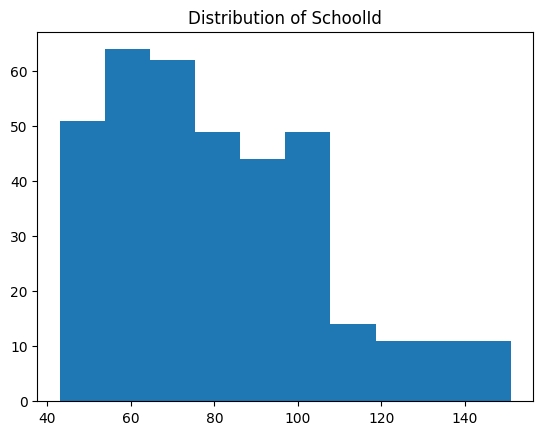

101
[ 70  56  78  71  54  93  49  64  48  92 101  73  60  44  96  67  86  85
  63  57  94  82  62  84  97  77  88  52  50  80  43  58 108  66  90 104
  65  72  46  59  69  47  81  68 103  99 107 102  61 100 139  53 119  75
 132  55 140 133 141 126  89 142 121 143 135  74 124 114 116 134 123 144
 130 127 112  87 111 145  98 150 122 146 147 138 151 131 120 137 128 148
 115 125 149  95 118  83 129  91 117 113 136]


In [14]:
fig, ax = plt.subplots()
ax.hist(df.SchoolId)
ax.set(title='Distribution of SchoolId')
plt.show()

print(df.SchoolId.nunique())
print(df.SchoolId.unique())

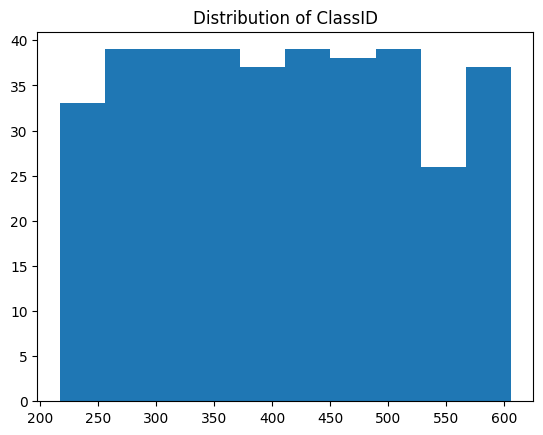

366


In [15]:
fig, ax = plt.subplots()
ax.hist(df.ClassID)
ax.set(title='Distribution of ClassID')
plt.show()

print(df.ClassID.nunique())
# print(df.ClassID.unique())

In [16]:
df.CreatedOn.nunique()

366

In [17]:
df.IsActive.value_counts()

IsActive
True     356
False     10
Name: count, dtype: int64

In [18]:
df[df.IsActive == False]

,AcademicYearId,AcademicYear,SchoolId,SchoolName,ClassID,ClassName,CreatedOn,IsActive,GradeId,District
3,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,495,NaN,2023-04-14 07:04:33.266,False,4,NaN
97,6,2023-Sarangani-Batch 1-Cycle 1,58,NaN,513,NaN,2023-04-14 07:21:55.506,False,4,NaN
155,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,303,NaN,2023-02-04 12:33:58.136,False,1,NaN
156,6,2023-Sarangani-Batch 1-Cycle 1,70,NaN,304,NaN,2023-02-04 12:34:08.936,False,1,NaN
179,6,2023-Sarangani-Batch 1-Cycle 1,64,NaN,482,NaN,2023-04-14 06:56:32.120,False,1,NaN
183,6,2023-Sarangani-Batch 1-Cycle 1,48,NaN,486,NaN,2023-04-14 06:59:26.376,False,1,NaN
201,6,2023-Sarangani-Batch 1-Cycle 1,44,NaN,397,NaN,2023-04-08 06:48:06.430,False,1,NaN
337,7,2023-Sarangani-Batch 2-Cycle 1,87,NaN,577,NaN,2023-05-07 03:02:26.413,False,14,NaN
356,7,2023-Sarangani-Batch 2-Cycle 1,95,NaN,291,NaN,2023-01-05 08:56:49.630,False,1,NaN
357,7,2023-Sarangani-Batch 2-Cycle 1,95,NaN,292,NaN,2023-01-05 08:57:03.470,False,2,NaN


In [19]:
df.loc[:, ['AcademicYear', 'IsActive']].groupby(['AcademicYear']).sum()/df.loc[:, ['AcademicYear', 'IsActive']].groupby(['AcademicYear']).count()

,IsActive
AcademicYear,
2023-Sarangani-Batch 1-Cycle 1,0.977564
2023-Sarangani-Batch 2-Cycle 1,0.944444


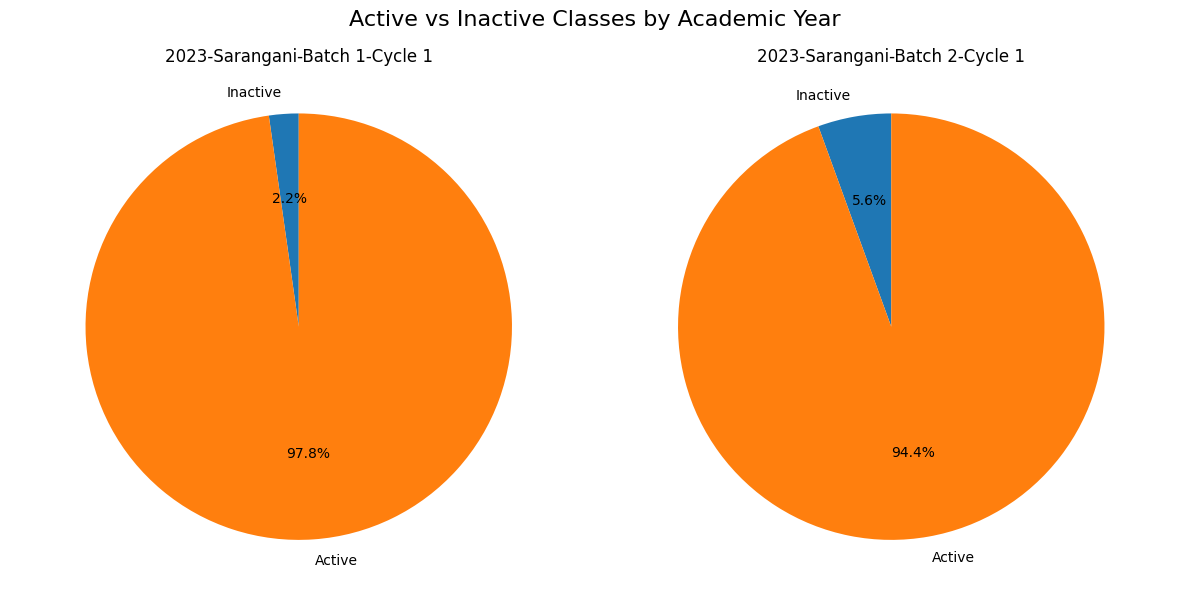

In [62]:
class_counts = df.groupby(['AcademicYear', 'IsActive']).size().unstack(fill_value=0)


num_years = len(class_counts.index)  # Number of unique academic years
fig, axes = plt.subplots(1, num_years, figsize=(6*num_years, 6))  # Adjust width for the number of years

for i, year in enumerate(class_counts.index):
    sizes = class_counts.loc[year]
    labels = ['Inactive', 'Active',]
    colors = ['#66b3ff', '#ff9999']
    
    # Plot pie chart in the corresponding subplot
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio for a perfect circle
    axes[i].set_title(f'{year}')  # Set the title for each pie chart

# Set the main title
fig.suptitle('Active vs Inactive Classes by Academic Year', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
(df.loc[:, ['AcademicYear', 'SchoolId']]).drop_duplicates().groupby('AcademicYear').count()

,SchoolId
AcademicYear,
2023-Sarangani-Batch 1-Cycle 1,50
2023-Sarangani-Batch 2-Cycle 1,51


In [12]:
df.GradeId.value_counts()

GradeId
4     152
14     57
1      56
2      51
3      50
Name: count, dtype: int64

In [13]:
(df.loc[:, ['AcademicYear', 'GradeId']]).groupby('AcademicYear').mean()

,GradeId
AcademicYear,
2023-Sarangani-Batch 1-Cycle 1,3.150641
2023-Sarangani-Batch 2-Cycle 1,13.537037


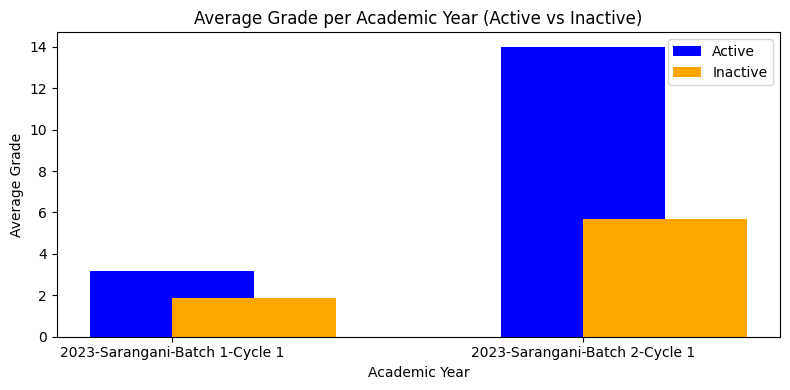

In [14]:
avg_grade = df.groupby(['AcademicYear', 'IsActive'])['GradeId'].mean().reset_index()

active_data = avg_grade[avg_grade['IsActive'] == True]
inactive_data = avg_grade[avg_grade['IsActive'] == False]

plt.figure(figsize=(8, 4))

plt.bar(active_data['AcademicYear'], active_data['GradeId'], color='blue', label='Active', width=0.4, align='center')

plt.bar(inactive_data['AcademicYear'], inactive_data['GradeId'], color='orange', label='Inactive', width=0.4, align='edge')

plt.title('Average Grade per Academic Year (Active vs Inactive)')
plt.xlabel('Academic Year')
plt.ylabel('Average Grade')
# plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()
